In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from toolbox import *

In [3]:
# load data
df = pd.read_csv("weatherHistory.csv")

In [4]:
# clean data
df = remove_df_outliers_iqr(df)
X, y = split_data(df)

/Users/luchicla/Work/RAU/software_packages_for_stats/toolbox.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] < lower_limit] = None
/Users/luchicla/Work/RAU/software_packages_for_stats/toolbox.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] > upper_limit] = None


In [5]:
# remove correlated features
corr_matrix = compute_correlation_matrix(X)
X = remove_correlated_columns(corr_matrix, X)

X.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [6]:
np.unique(y)

array(['rain', 'snow'], dtype=object)

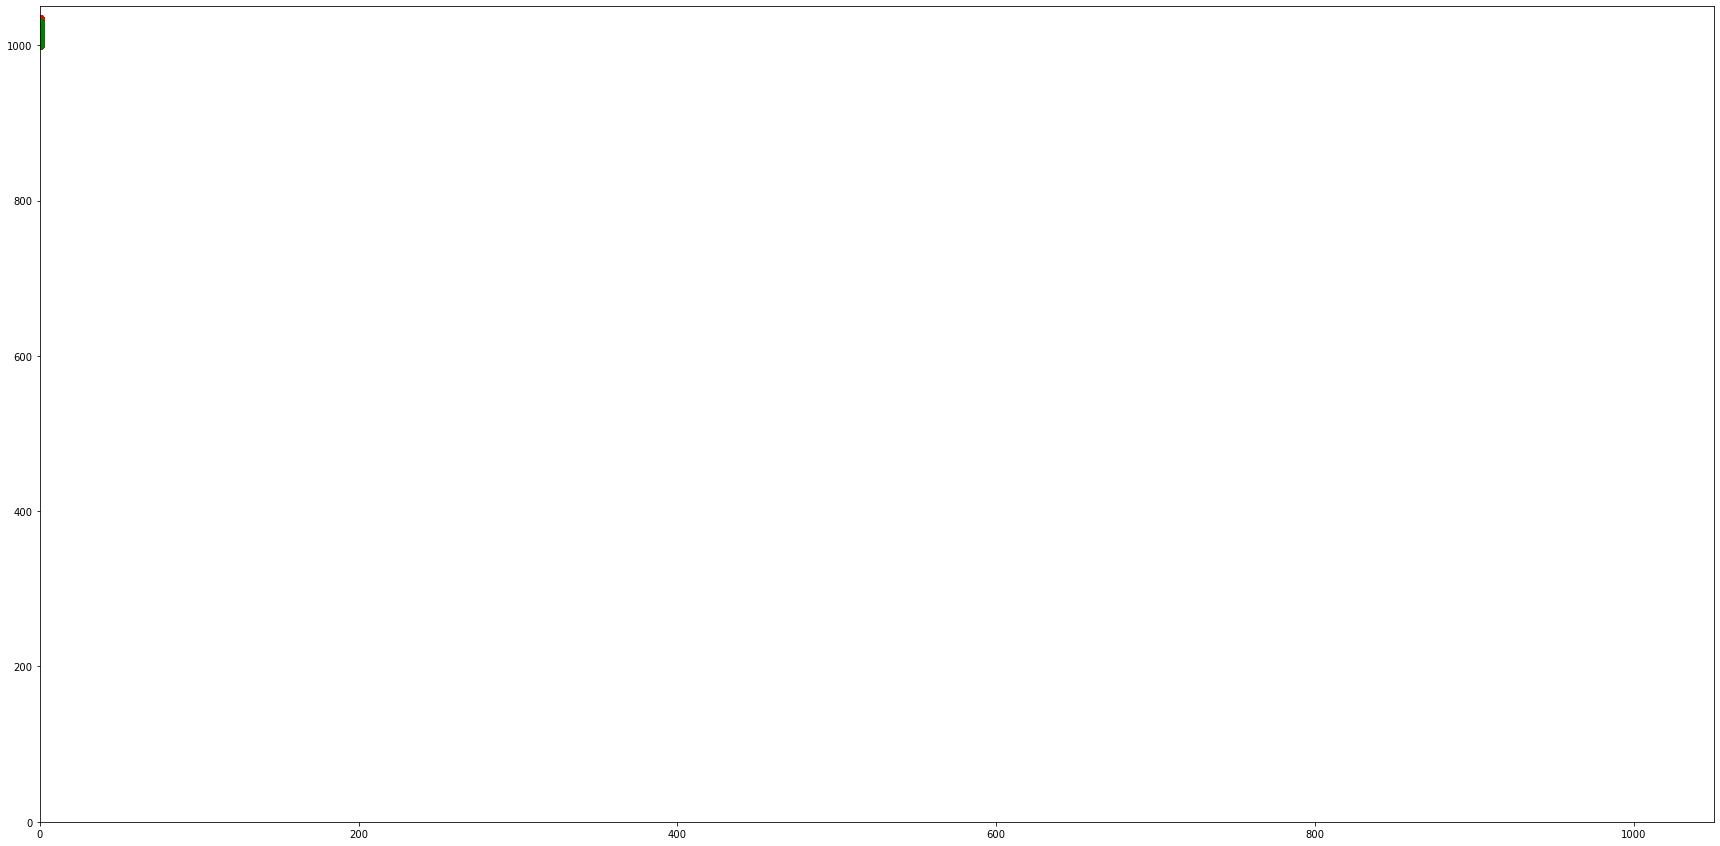

In [7]:
x1 = X["Humidity"]
x2 = X["Pressure (millibars)"]
color_map = {
    "rain": "green",
    "snow": "red",
    None: "magenta"
}
colors = []
for yi in y:
    colors.append(color_map[yi])

_ = plt.figure(figsize=(30, 15))
plt.scatter(x1, x2, c=colors, s=25)
plt.xlim(0, 1050)
plt.ylim(0, 1050)
plt.show()

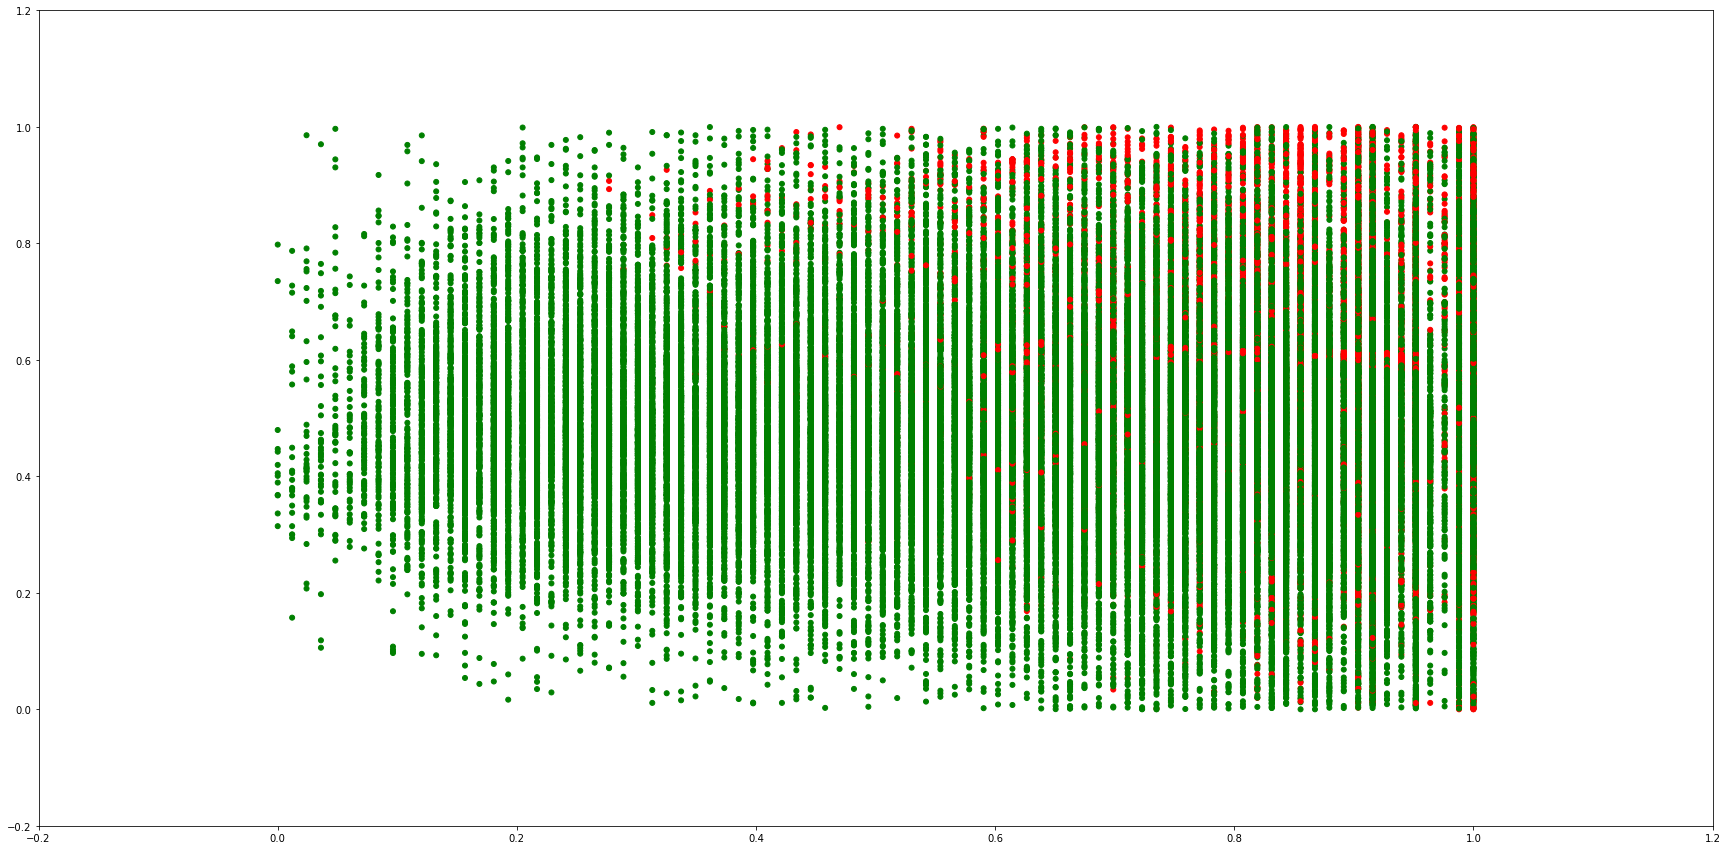

In [9]:
x1_scaled = min_max_scale(x1)
x2_scaled = min_max_scale(x2)

color_map = {
    "rain": "green",
    "snow": "red",
    None: "magenta"
}
colors = []
for yi in y:
    colors.append(color_map[yi])

_ = plt.figure(figsize=(30, 15))
plt.scatter(x1_scaled, x2_scaled, c=colors, s=25)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.show()